Gerekli kütüphaneleri ekledim.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score , classification_report


Datasetini ekledim.

In [ ]:
df = pd.read_csv("/content/Admission_Predict.csv")

İlk 5 satırını görümtledim.

In [ ]:
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


eksik değer analizi yaptım.

In [ ]:
df.isna().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


df dataframe in column adlarına baktım.

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

Chance of Admit columnu kaç farklı değer içerdiğine baktım.

In [ ]:
df['Chance of Admit '].unique()

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.63, 0.64, 0.7 , 0.94, 0.95,
       0.97, 0.44, 0.46, 0.74, 0.91, 0.88, 0.58, 0.48, 0.49, 0.53, 0.87,
       0.86, 0.89, 0.82, 0.56, 0.36, 0.42, 0.47, 0.55, 0.57, 0.96, 0.93,
       0.38, 0.34, 0.79, 0.71, 0.69, 0.59, 0.85, 0.77, 0.81, 0.83, 0.67,
       0.73, 0.6 , 0.43, 0.51, 0.39])

Chance of Admit column nun 0.75 büyük değerlerini 1e eğer küçükse 0 a dönüştürüyor.

In [ ]:
df['Chance of Admit '] = (df['Chance of Admit '] >= 0.75).astype(int)

Chance of Admit columnun adını değiştirdim.

In [ ]:
df = df.rename(columns={'Chance of Admit ':'Chance_of_Admit'})

Chance of Admit tekrardan baktığımda artık sadece 0,1 değerleri var.

In [ ]:
df['Chance_of_Admit'].unique()

array([1, 0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance_of_Admit    400 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.3 KB


sadece serial no nun işime yaramayacağını düşündüğüm için sadece onu çıkarttım.

In [ ]:
X = df.drop(['Chance_of_Admit','Serial No.'] , axis=1)
y = df["Chance_of_Admit"]

In [ ]:
X = df.drop(['Chance_of_Admit','Serial No.'] , axis=1)
y = df["Chance_of_Admit"]

%80 train %20 test olucak şekilde verimi 2ye böldüm.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


standard scaler uyguladım.

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
x_train

array([[ 0.45711129,  0.42466178, -0.057308  , ..., -1.05965163,
         0.13986648,  0.92761259],
       [ 0.1022887 ,  0.42466178, -0.057308  , ..., -0.50194025,
         0.36110014, -1.07803625],
       [ 2.05381293,  2.08593034,  1.6892215 , ...,  1.17119391,
         2.25009529,  0.92761259],
       ...,
       [-0.96217907, -0.40597251, -0.93057275, ..., -0.50194025,
        -0.62594237,  0.92761259],
       [-1.31700165, -1.40273364, -1.8038375 , ..., -1.61736302,
        -2.27668588, -1.07803625],
       [-0.25253389, -0.23984565, -0.93057275, ...,  0.05577114,
        -0.57488845, -1.07803625]])

Logistic Regression tanımladım

In [ ]:
log_reg = LogisticRegression()

eğitim verimi eğitmeye başladım.

In [ ]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
test_y_pred = log_reg.predict(x_test)

In [ ]:
test_y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

Modelin doğruluk oranını hesapladım 0.95  gayet güzel bir score ama precision,recall ve f1 score da bakmak daha iyi olur.

In [ ]:
acc_score = accuracy_score(y_test, test_y_pred)
print("accuracy score :", acc_score)

accuracy score : 0.95


confusion matrix e baktığımda model sadece 2 tane kabul edilmemiş öğrenciye kabul eddilmiş ve 2 tandede kabul edilmedi demesine rağmen kabul edildilen öğrencileri gördüm.

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, test_y_pred)
confusion_matrix

array([[45,  2],
       [ 2, 31]])

görselleştirdim.

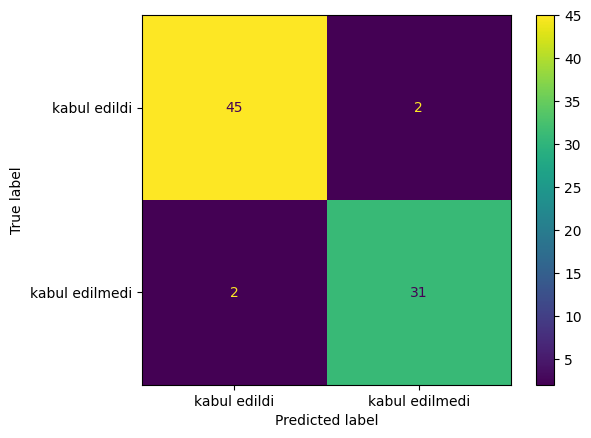

In [ ]:
c_m_d = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["kabul edildi", "kabul edilmedi"])
c_m_d.plot()
plt.show()

diğer matriclere de baktığımda modelin gayet iyi bir sonuç verdiğini düşünüyorum.

In [ ]:
print(classification_report(y_test, test_y_pred, target_names= ["kabul edildi", "kabul edilmedi"]))

                precision    recall  f1-score   support

  kabul edildi       0.96      0.96      0.96        47
kabul edilmedi       0.94      0.94      0.94        33

      accuracy                           0.95        80
     macro avg       0.95      0.95      0.95        80
  weighted avg       0.95      0.95      0.95        80



In [ ]:
sgd_model = SGDClassifier(loss="log_loss", max_iter=1000, tol=1e-4, random_state=42, verbose=1)

sgd_model.fit(x_train, y_train.values.ravel())

print(f"\nSon Bias (b): {sgd_model.intercept_}")
print(f"Son Ağırlıklar (W): {sgd_model.coef_[:3]}")

-- Epoch 1
Norm: 37.88, NNZs: 7, Bias: -9.922999, T: 320, Avg. loss: 3.826109
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 24.18, NNZs: 7, Bias: 3.722604, T: 640, Avg. loss: 2.875460
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 25.39, NNZs: 7, Bias: -5.767029, T: 960, Avg. loss: 2.197752
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 24.45, NNZs: 7, Bias: -1.303528, T: 1280, Avg. loss: 1.842952
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 18.74, NNZs: 7, Bias: -1.301470, T: 1600, Avg. loss: 1.828403
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 13.22, NNZs: 7, Bias: -2.510519, T: 1920, Avg. loss: 1.534981
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 10.24, NNZs: 7, Bias: 0.676767, T: 2240, Avg. loss: 1.495193
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 10.01, NNZs: 7, Bias: -8.804867, T: 2560, Avg. loss: 1.032687
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.09, NNZs: 7, Bias: -0.629634, T: 2880, Avg. loss: 1.126072
Total training 

diğer eşik değerleriyle denediğimde en iyi sonucu 0.75 olduğunu gördüm.